**2.1 感知机模型**

逻辑“与”功能

In [1]:
import numpy as np

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
print("输入[0, 0]时， 结果为",format(AND(0,0)))
print("输入[0, 1]时， 结果为",format(AND(0,1)))
print("输入[1, 0]时， 结果为",format(AND(1,0)))
print("输入[1, 1]时， 结果为",format(AND(1,1)))

输入[0, 0]时， 结果为 0
输入[0, 1]时， 结果为 0
输入[1, 0]时， 结果为 0
输入[1, 1]时， 结果为 1


逻辑“或”功能

In [4]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print("输入[0, 0]时， 结果为",format(OR(0,0)))
print("输入[0, 1]时， 结果为",format(OR(0,1)))
print("输入[1, 0]时， 结果为",format(OR(1,0)))
print("输入[1, 1]时， 结果为",format(OR(1,1)))

输入[0, 0]时， 结果为 0
输入[0, 1]时， 结果为 1
输入[1, 0]时， 结果为 1
输入[1, 1]时， 结果为 1


逻辑“与非”操作

In [6]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
print("输入[0, 0]时， 结果为",format(NAND(0,0)))
print("输入[0, 1]时， 结果为",format(NAND(0,1)))
print("输入[1, 0]时， 结果为",format(NAND(1,0)))
print("输入[1, 1]时， 结果为",format(NAND(1,1)))

输入[0, 0]时， 结果为 1
输入[0, 1]时， 结果为 1
输入[1, 0]时， 结果为 1
输入[1, 1]时， 结果为 0


逻辑“异或”操作

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [9]:
print("输入[0, 0]时， 结果为",format(XOR(0,0)))
print("输入[0, 1]时， 结果为",format(XOR(0,1)))
print("输入[1, 0]时， 结果为",format(XOR(1,0)))
print("输入[1, 1]时， 结果为",format(XOR(1,1)))

输入[0, 0]时， 结果为 0
输入[0, 1]时， 结果为 1
输入[1, 0]时， 结果为 1
输入[1, 1]时， 结果为 0


**2.2 神经网络的架构**

ReLU, sigmoid, softmax函数实现

In [10]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

**2.3 神经网络原理**

均方误差损失函数

In [11]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

mean_squared_error(y, t)

0.09750000000000003

交叉熵损失函数

In [12]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

cross_entropy_error(y, t)

0.510825457099338

当输出为独热编码时，交叉熵损失函数实现为

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

数值微分实现为

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) /(2* h)

对于多维数据来说，梯度是由各变量的偏微分值组成的向量来表示的，梯度的数值计算实现为

In [15]:
def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

有了数值计算法，我们就可以根据损失函数来计算其对于网络参数的梯度，并根据梯度值更新网络参数。其实现代码如下

In [16]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient_1d(f, x)
        x -= lr * grad
    return x

例：请用梯度法求$$f(x_0+x_1)=x_0^2+x_1^2$$的最小值

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
result=gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(result)

[-6.11110793e-10  8.14814391e-10]


这与真实的最优解[0,0]非常接近，在误差允许范围内

下面，我们设计代码实现神经网络的梯度下降。
首先定义一个简单的神经网络，并使用随机数初始化其连接权重。

In [18]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

前面介绍的数值梯度计算函数是针对1维数据的，我们将其改名为_numerical_gradient_1d()，下面基于其拓展针对二维数据的实现版本

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

下面，定义该网络实例net，并给出输入数据x和监督数据t

In [20]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1]) # 正确解标签
print(net.loss(x, t))

[[ 0.73725181  2.69667151 -0.27394139]
 [ 0.45856021  0.17624066  0.29355232]]
2.137288702774051


接下来，定义网络的损失函数为f，并计算其梯度

In [21]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.15063539  0.37857966 -0.52921505]
 [ 0.22595309  0.56786949 -0.79382257]]


设定学习率lr=0.1，使网络进行学习迭代，可以看到损失下降

In [22]:
lr=0.1
for i in range(5):
    net.W=net.W-dW*lr
    print(net.loss(x, t))

1.99395250186659
1.8541339027107218
1.7182008926979386
1.5865339262798654
1.4595181120910683


**2.4 神经网络学习实践**

针对前面的手写数字识别的问题，我们构造如下的神经网络类。类中封装了初始化函数__init__()、推理函数predict()、损失函数loss()、准确率计算函数accuracy()、和梯度计算函数numerrical_gradient()

In [23]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

前面的numerical_gradient()求导函数可以使用下面的反向传播求导函数gradient()来代替

先下载数据集

In [24]:
from mnist import init_mnist, load_mnist

init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


读入数据，并设定超参数

In [25]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

训练并可视化训练过程

train acc, test acc | 0.11873333333333333, 0.1171
train acc, test acc | 0.7776, 0.7854
train acc, test acc | 0.8798333333333334, 0.881
train acc, test acc | 0.8984666666666666, 0.9015
train acc, test acc | 0.9082333333333333, 0.9089
train acc, test acc | 0.91465, 0.9169
train acc, test acc | 0.9201333333333334, 0.9207
train acc, test acc | 0.9246666666666666, 0.925
train acc, test acc | 0.9278, 0.9292
train acc, test acc | 0.9313, 0.931
train acc, test acc | 0.9343666666666667, 0.9349
train acc, test acc | 0.93865, 0.9372
train acc, test acc | 0.94, 0.9398
train acc, test acc | 0.9431666666666667, 0.9421
train acc, test acc | 0.94455, 0.9429
train acc, test acc | 0.9465666666666667, 0.9455
train acc, test acc | 0.9484833333333333, 0.9455


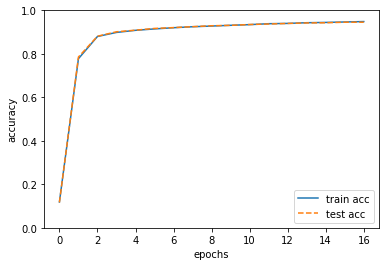

In [26]:
import matplotlib.pyplot as plt
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**2.5 神经网络学习技巧**

批量归一化实现

In [27]:
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv层的情况下为4维，全连接层的情况下为2维  

        # 测试时使用的平均值和方差
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward时使用的中间数据
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

Dropout实现

In [28]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

增加了BN和Dropout的多层感知机实现为

数据增强，原图像如下

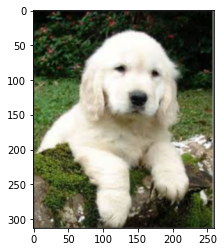

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('./dog.png')
img = np.array(img)
plt.imshow(img)
plt.show()

1. 对图片进行翻转

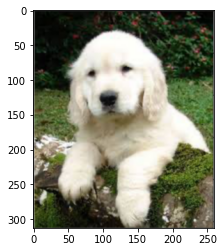

In [30]:
flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.show()

2. 通过对图像进行平移，可以使得部分的原始图像被遮挡，有助于模型在无法看到完整图像的情况下做出预测

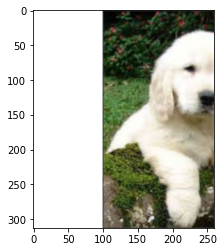

In [31]:
h, w = img.shape[:2]
res = np.zeros(img.shape, img.dtype)
for i in range(0, h):
    for j in range(0, w-100):
        res[i, j + 100] = img[i, j]

plt.imshow(res)
plt.show()

3. 通过向图片添加各类噪声，能够使得模型更加鲁棒

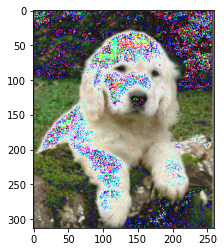

In [32]:
# ADDING NOISE
h, w, d = img.shape
noise = np.random.randint(-20, high=20, \
			size = (h, w, d), dtype = 'int8')
noisy_img = img
for i in range(h):
    for j in range(w):
        for k in range(d):
            if (noisy_img[i][j][k] != 255):
                noisy_img[i][j][k] += noise[i][j][k]
plt.imshow(noisy_img)
plt.show()

4. 对图像实施0-360的旋转

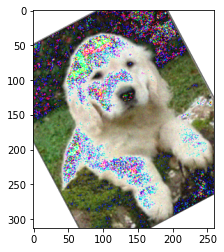

In [33]:
import cv2
def randomly_rotate_image(img):
    """
    img:cv2 image, uint8 array
    """
    h, w, c = img.shape
    angle = 360 * np.random.random()
    center = (w/2., h/2.)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    _img = cv2.warpAffine(img, M, (w, h))
    return _img

rotated_img = randomly_rotate_image(img)
plt.imshow(rotated_img)
plt.show()

5. 随机调整饱和度与亮度

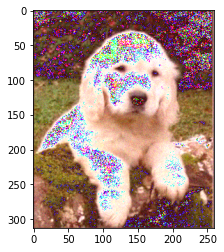

In [34]:
def randomly_brightness_and_contrast_adjust(img):
    """
    img:cv2 image, uint8 array
    """
    alpha = 0.5 + np.random.random()
    beta = int(np.random.choice([-1, 1]) * np.random.random() * 255)
    _img = np.uint8(np.clip(cv2.add(alpha * img, beta), 0, 255))
    return _img

new_img = randomly_brightness_and_contrast_adjust(img)
plt.imshow(new_img)
plt.show()